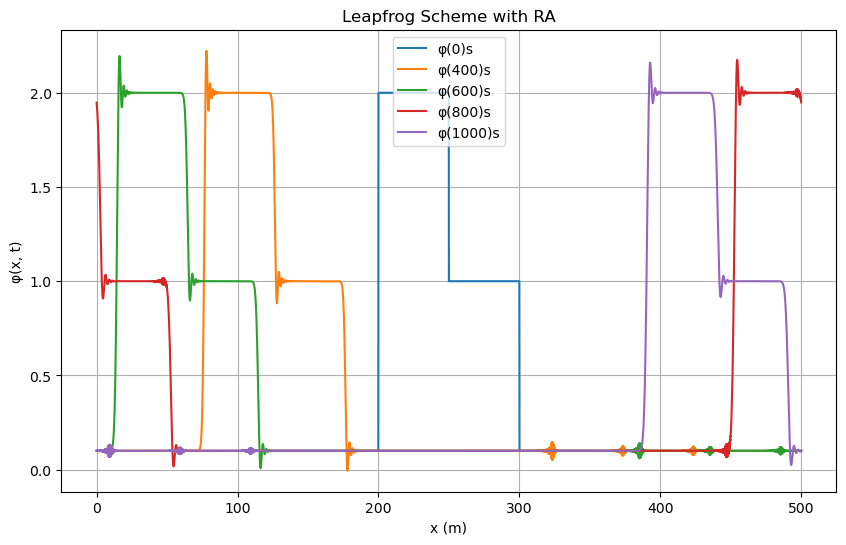

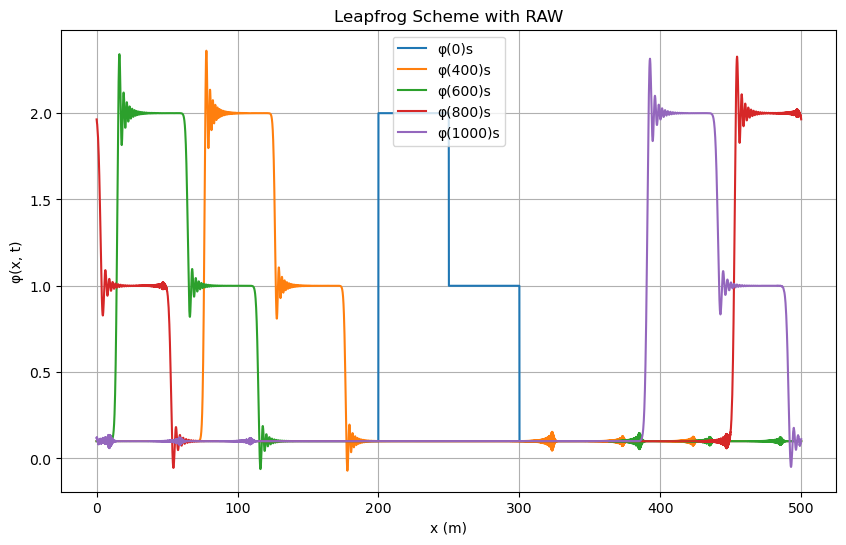

In [15]:
import numpy as np
import matplotlib.pyplot as plt


u = -0.31  
dx = 0.1  
x0 = 0
x1 = 500
dt = 0.1 
a_ra = 0.1
a_raw = 0.05
b_raw = 0.53
t0 = 0
t1 = 1000
tp = 200

nx = int((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)


def phi0(x):
    if x < 200:
        return 0.1
    elif 200 <= x < 250:
        return 2.0
    elif 250 <= x <= 300:
        return 1.0
    else:
        return 0.1

phi = np.array([phi0(xi) for xi in x])


def ctcs(phi_o, phi_n, c):
    return phi_o - c * (np.roll(phi_n, -1) - np.roll(phi_n, 1))


def RA(phi_o, phi_n, phi_n1, a):
    d = a * (phi_o + phi_n1 - 2.0 * phi_n)
    return phi_n + d


def RAW(phi_o, phi_n, phi_n1, a, b):
    d = a * (phi_o + phi_n1 - 2.0 * phi_n)
    phi_n1f = phi_n + b * d
    phi_n1f2 = phi_n1 + (1 - b) * d
    return phi_n1f, phi_n1f2


fig_RA, ax_RA = plt.subplots(figsize=(10, 6))
fig_RAW, ax_RAW = plt.subplots(figsize=(10, 6))


phi_o_RAW = phi.copy()
phi_n_RAW = phi.copy()
c = u * (dt / dx)
t = t0

solu_RAW = [phi.copy()]
times_RAW = [t0]

while t < t1:
    phi_n1_RAW = ctcs(phi_o_RAW, phi_n_RAW, c)
    phi_nf_RAW, phi_n1f_RAW = RAW(phi_o_RAW, phi_n_RAW, phi_n1_RAW, a_raw, b_raw)
    phi_o_RAW[:] = phi_nf_RAW
    phi_n_RAW[:] = phi_n1f_RAW
    t = t + dt

    if np.isclose(t % tp, 0, atol=dt / 2):
        solu_RAW.append(phi_n_RAW.copy())
        times_RAW.append(t)


for i, sol in enumerate(solu_RAW):
    ax_RAW.plot(x, sol, label=f'φ({times_RAW[i]:.0f})s')


phi_o_RA = phi.copy()
phi_n_RA = phi.copy()
t = t0

solu_RA = [phi.copy()]
times_RA = [t0]

while t < t1:
    phi_n1_RA = ctcs(phi_o_RA, phi_n_RA, c)
    phi_nf_RA = RA(phi_o_RA, phi_n_RA, phi_n1_RA, a_ra)
    phi_o_RA[:] = phi_nf_RA
    phi_n_RA[:] = phi_n1_RA
    t = t + dt

    if np.isclose(t % tp, 0, atol=dt / 2):
        solu_RA.append(phi_n_RA.copy())
        times_RA.append(t)


for i, sol in enumerate(solu_RA):
    ax_RA.plot(x, sol, label=f'φ({times_RA[i]:.0f})s')


ax_RA.set_xlabel('x (m)')
ax_RA.set_ylabel('φ(x, t)')
ax_RA.set_title('Leapfrog Scheme with RA')
ax_RA.legend()
ax_RA.grid(True)

ax_RAW.set_xlabel('x (m)')
ax_RAW.set_ylabel('φ(x, t)')
ax_RAW.set_title('Leapfrog Scheme with RAW')
ax_RAW.legend()
ax_RAW.grid(True)

plt.show()
